In [39]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Loading tha data
dataset = pd.read_csv('Churn_Modelling.csv')

In [41]:
print(dataset)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [42]:
# Data Analysis
dataset.info() # this will be useful when there is null in some datasets to fill those null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [43]:
# This is useful to check the value is null or not if nulll then 1, else 0
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [44]:
# As you can see all rows are filled with non-null values

In [45]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [46]:
# let's plot heat map to see the correlation between the attributes
# But correlation heat map can be drawn for only numerical attributes
# We can draw heatmap for all attributes by preprocessing all data into numerical values but this doesnot give any useful information as after prepocessing values doesn't indicate actual values

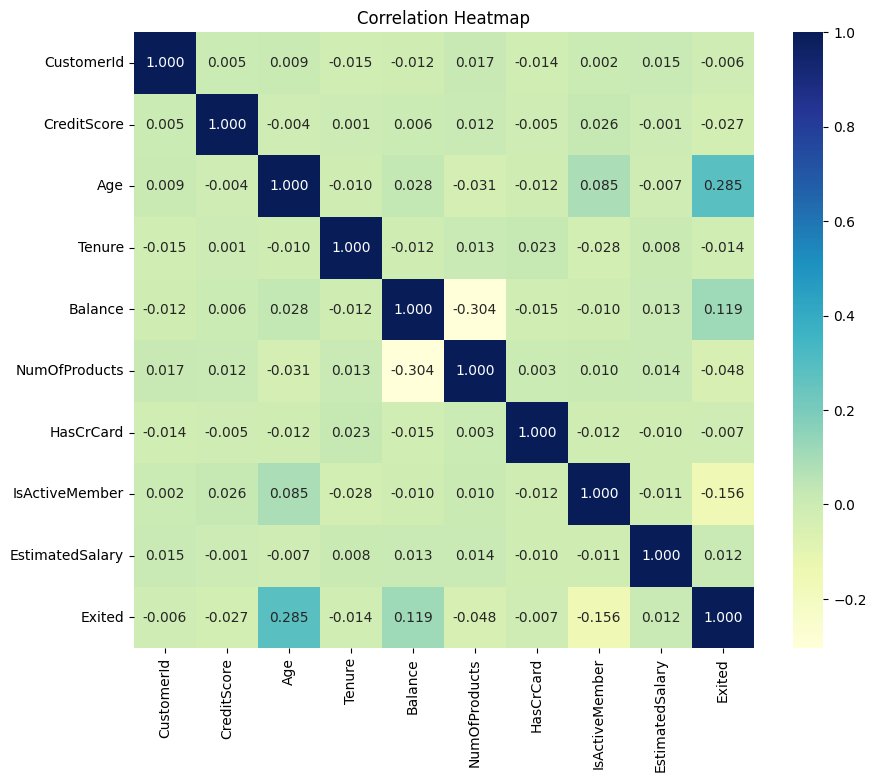

In [47]:
# heatmap only for those attributes whose values are numerical
corr_matrix=dataset[['CustomerId','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,fmt='.3f',cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-48-346f5e503d87>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(dataset['Age'][dataset['Exited']==1],shade=True,color='r')
<ipython-input-48-346f5e503d87>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(dataset['Age'][dataset['Exited']==0],shade=True,color='b')


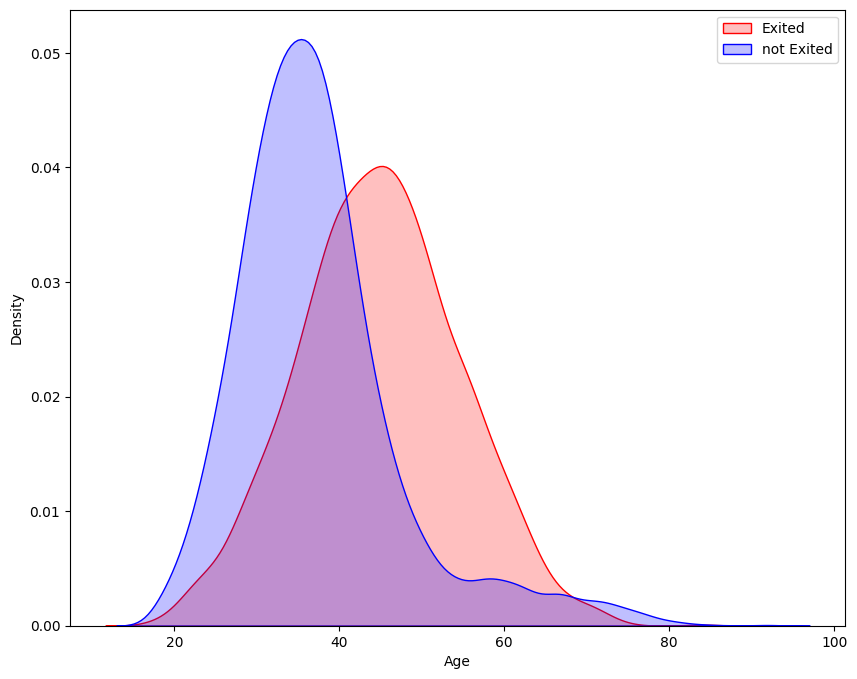

In [48]:
# Age and Exited(target variable)
plt.figure(figsize=(10,8))
# Plotting Density function graph of the merchant and is_fraud(target variable)
kde = sns.kdeplot(dataset['Age'][dataset['Exited']==1],shade=True,color='r')
kde = sns.kdeplot(dataset['Age'][dataset['Exited']==0],shade=True,color='b')
kde.set_xlabel('Age')
kde.set_ylabel('Density')
kde.legend(['Exited','not Exited'])

In [49]:
# from the above graph we can draw few observations that if the age is between 40-60 the person is exited which is shown with red plot
# where as in the blue plot some people are not exited even though their age is between 40-60 which shows that this is not only the attribute which we should consider

In [50]:
# Transforming the data
from sklearn.preprocessing import LabelEncoder
X = dataset.drop('Exited',axis=1).values
y = dataset['Exited']
Le = LabelEncoder()
for i in range(len(X[0])):
  X[:,i] = Le.fit_transform(X[:,i])
print(X)
print(y)

[[0 2736 1115 ... 1 1 5068]
 [1 3258 1177 ... 0 1 5639]
 [2 2104 2040 ... 1 0 5707]
 ...
 [9997 717 1570 ... 0 1 2062]
 [9998 4656 2345 ... 1 0 4639]
 [9999 2497 2751 ... 1 0 1878]]
0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [57]:
# Importing the necessary libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [58]:
# Fitting the model
clf = LogisticRegression(random_state=42)
# dividing into train and test data
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2,random_state=42)
# Training the model
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [59]:
# finding the predictions and acuracy
# here accuracy is the test accracy
predictions = clf.predict(X_test1)
print(predictions)
print(accuracy_score(y_test1,predictions))

[0 0 0 ... 0 0 0]
0.7945


In [60]:
# let's find the train and test score or accuracy
train_clf= clf.score(X,y)
test_clf= clf.score(X_test1,y_test1)
print(train_clf)
print(test_clf)

0.7886
0.7945


In [61]:
# let's see the actual and predicted value
print("actual value: ", y_test1[10])
print("predicted value: ",clf.predict(X_test1)[10])

actual value:  0
predicted value:  0


In [62]:
# confusion matrix
print(confusion_matrix(y_test,predictions))

[[1556   51]
 [ 360   33]]


In [63]:
# It predicted correctly

In [64]:
# That's the Customer Churn Prediction using Logistic regression